# Optimizing Bids for Maximum Profit

## Problem Setup

In this problem, we are tasked with determining the optimal bid pair \( b_1 \) and \( b_2 \) to maximize the expected profit from selling flippers. The guaranteed sell price for the flippers are \$320, and the reserve price follows a uniform distribution across two intervals:

- **160 to 200**
- **250 to 300**

There is a gap between 200 and 250, where no reserve prices exist.

### Key Definitions:
- \( b_1 \): The first bid, which will be accepted if the reserve price is between 160 and \( b_1 \).
- \( b_2 \): The second bid, which will be accepted if the reserve price is between \( b_1 \) and \( b_2 \).
Note: in the problem the second bid is dependent on the average of the second bid of other players. However, for this optimisation problem we will not consider that just yet.

- **Profit Function**: The expected profit is determined by how much you pay for the flippers (the bids \( b_1 \) and \( b_2 \)) and how much the turtle's reserve price is.

### Goal:
We aim to find the optimal pair of bids \( b_1 \) and \( b_2 \) that maximize the expected profit.

## Mathematical Derivation

Here is what the reserve price distribution looks like:



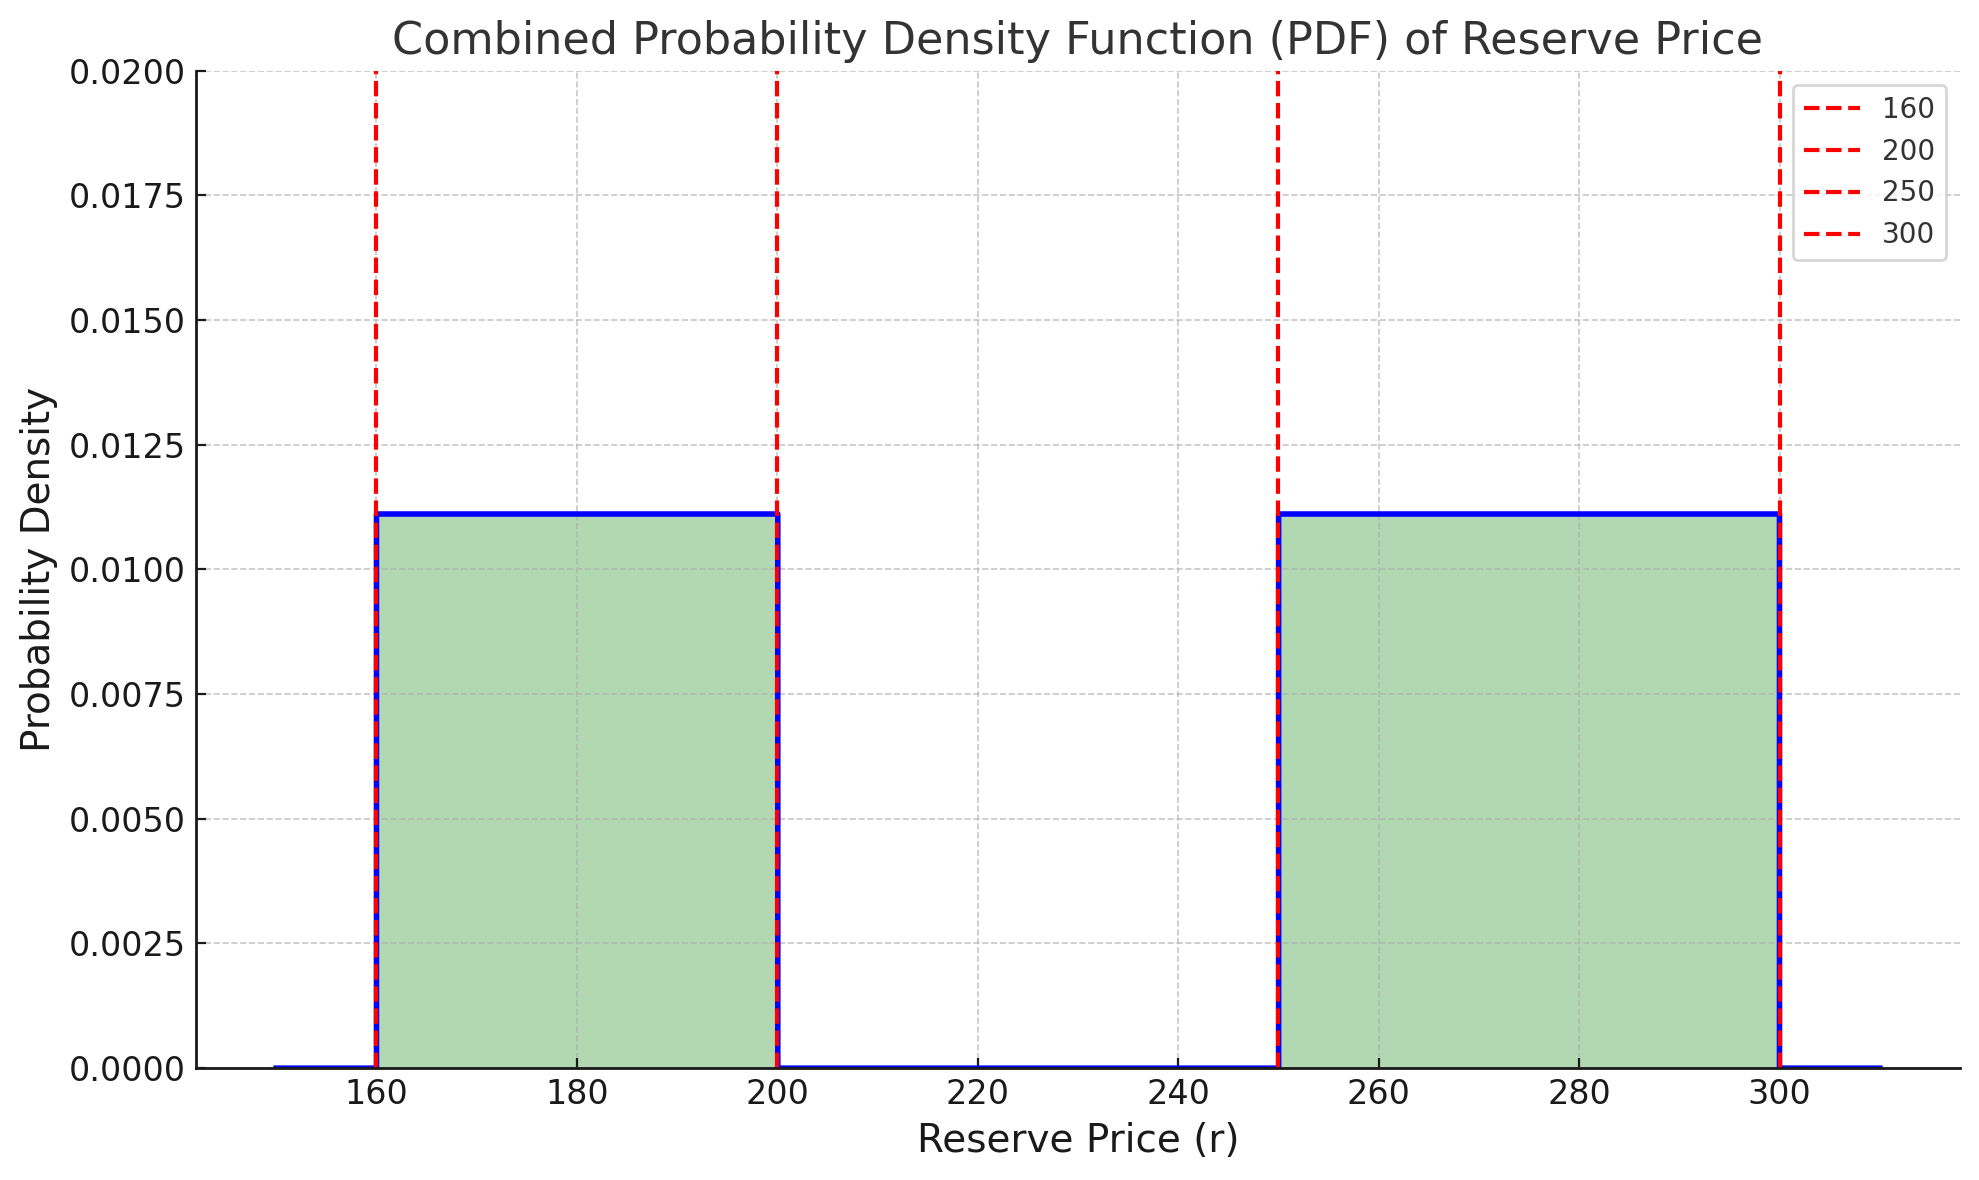

Since the PDF (probability function) is uniform:
p(x) = a
(we can already see from the plot a = 0.111...)

Since the area under any PDF has to equal to 1, we can just do some basic math to solve for a:


$\text{Area} = 1 = \int_{160}^{200} a \, dr + \int_{250}^{320} a \, dr$


$1 = (200-160)a + (320-250)a$

$a= \frac{1}{90}$

So we have the updated PDF:


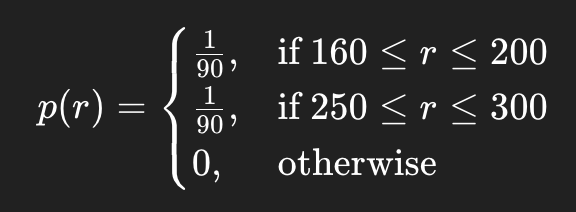

Now the distribution of the profit is as follows:

$
\text{Profit}(b_1, b_2) =
\begin{cases}
320-b_1, & \text{if} \ 160 \leq r \leq b_1 \\
320-b_2, & \text{if} \ b_1 < r \leq b_2 \\
0, & \text{otherwise}
\end{cases}
$


### Expected Profit Equation:

Given the uniform distribution of the reserve price \( r \) between the intervals \( [160, 200] \) and \( [250, 300] \), we can define the expected profit as:

$ E[\text{Profit}] = (320-b_1)P(160\leq r\leq b_1) + (320-b_2)P(b_1\leq r\leq b_2)$

Intergrating:

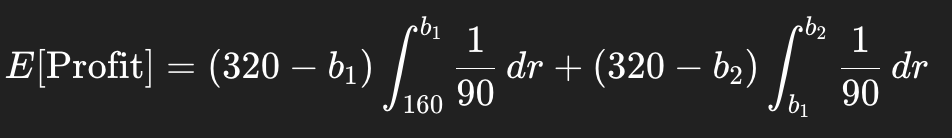

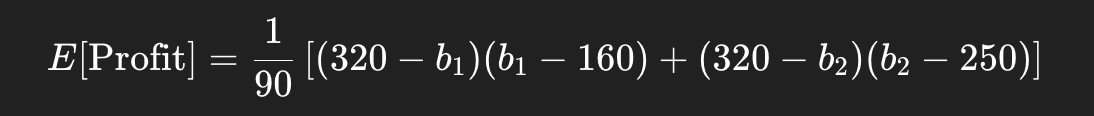

Intuitively I chose $b_1 = 200$ to capture the sales for all the turtles with reserve prices between 160 and 200

We can also prove it to ourselves using simultaneous equations obtained from deriving $E[\text{profit}]$ with respect to $b_1$ and $b_2$

$\frac{d}{db_1} E[\text{Profit}] = \frac{1}{90} \left( -2b_1 + 160 + b_2 \right)=0$

$\frac{d}{db_2} E[\text{Profit}] = \frac{1}{90} \left( 320 - 2b_2 + b_1 \right)=0
$

By solving for these two equations we get:

$b_1 \approx 213.33, \quad b_2 \approx 266.67$

Since the distribution is 0 from 200 to 250, we will take $b_1=200$ and recalculate optimal bid for $b_2$


### Optimization

To find the optimal value of \( b_2 \), we fix \( b_1 = 200 \) and maximize the expected profit by solving for \( b_2 \).

#### Step-by-step process:

1. **First, simplify the equation** with \( b_1 = 200 \):

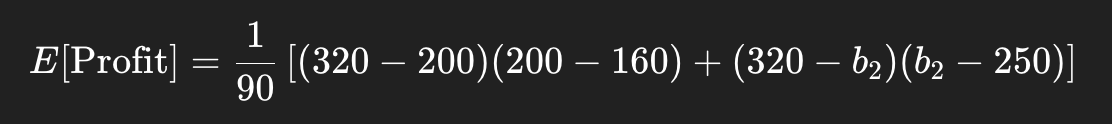

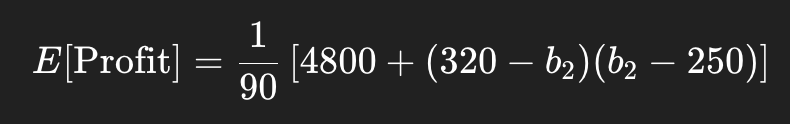

Simplifying, we get:

$E[\text{Profit}] = \frac{1}{90} \left[ -b_2^2 + 570b_2 - 75200 \right]$


2. **Differentiate** the profit function with respect to \( b_2 \) and set the derivative equal to zero to find the optimal \( b_2 \).





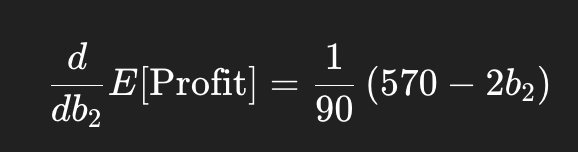

Setting this equal to zero:

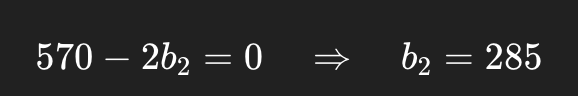


Thus, the optimal \( b_2 \) is **285** when \( b_1 = 200 \).

### Conclusion:

By fixing \( b_1 = 200 \), we find that the optimal second bid \( b_2 \) is **285**, which maximizes the expected profit to **\$66.94**.

## Code Implementation

Now, let's implement this optimization in Python to verify our result.

In [ ]:
#importing
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Optimal Bid 2 (b2): 285.0000142918136
Optimal Expected Profit: 66.94444444444218


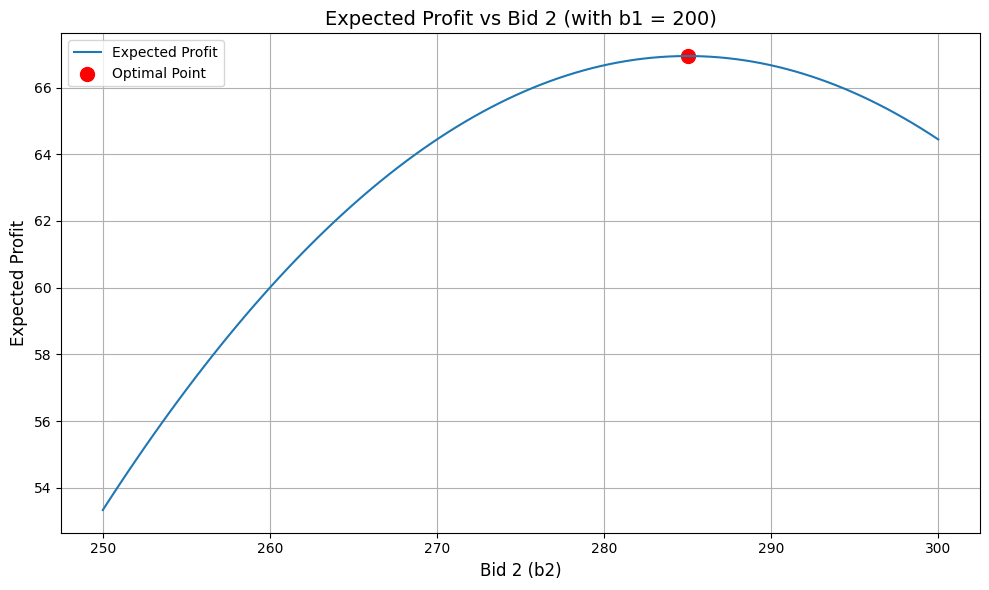

In [6]:


# Define the expected profit function with b1 fixed at 200
def profit_fixed_b1(b2):
    b1 = 200  # Fixed value of b1
    return (1/90) * ((320 - b1) * (b1 - 160) + (320 - b2) * (b2 - 250))

# Now we optimize for b2 only, as b1 is fixed at 200
result_b2 = minimize(lambda b2: -profit_fixed_b1(b2), 260, bounds=[(250, 300)])

# Extract the optimal b2 and the corresponding profit
optimal_b2_fixed_b1 = result_b2.x[0]
optimal_profit_fixed_b1 = -result_b2.fun

# Print optimal results
print(f"Optimal Bid 2 (b2): {optimal_b2_fixed_b1}")
print(f"Optimal Expected Profit: {optimal_profit_fixed_b1}")

# Plot the surface for the expected profit with b1 fixed at 200
b2_vals = np.linspace(250, 300, 100)
profits_b2 = [profit_fixed_b1(b2) for b2 in b2_vals]

# Plot the expected profit as a function of b2
plt.figure(figsize=(10, 6))
plt.plot(b2_vals, profits_b2, label='Expected Profit')
plt.scatter(optimal_b2_fixed_b1, optimal_profit_fixed_b1, color='r', s=100, label='Optimal Point')
plt.xlabel('Bid 2 (b2)', fontsize=12)
plt.ylabel('Expected Profit', fontsize=12)
plt.title('Expected Profit vs Bid 2 (with b1 = 200)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
